In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
resultData = pd.read_csv("archive/results.csv")
resultData.head(6)

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007
5,Reading,Middlesbrough,3.0,2.0,H,2006-2007


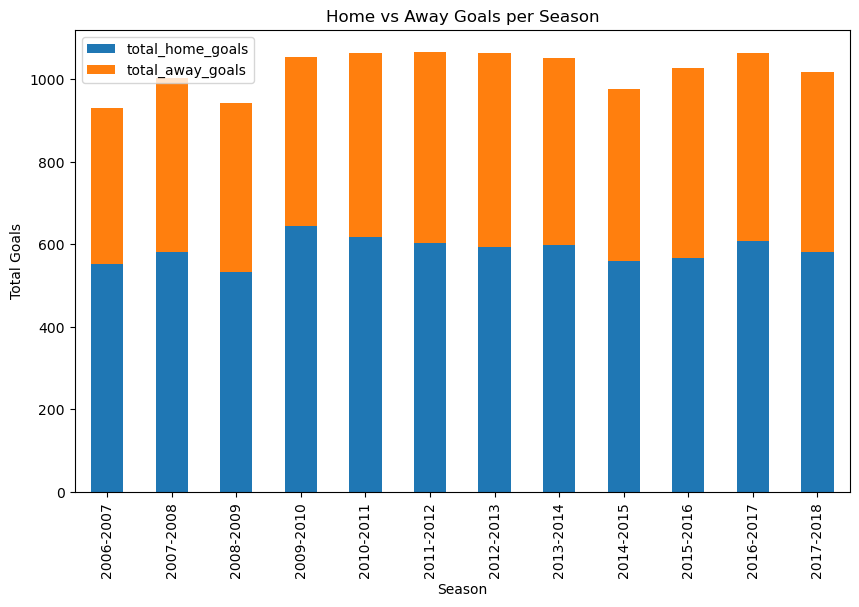

In [7]:
# Goals Scored by Home and Away Teams per Season (Bar Plot)
goals_per_season = resultData.groupby('season').agg(
    total_home_goals=('home_goals', 'sum'),
    total_away_goals=('away_goals', 'sum')
).reset_index()

# Plotting
goals_per_season.plot(x='season', kind='bar', stacked=True, 
                      figsize=(10, 6), title='Home vs Away Goals per Season')
plt.xlabel('Season')
plt.ylabel('Total Goals')
plt.show()

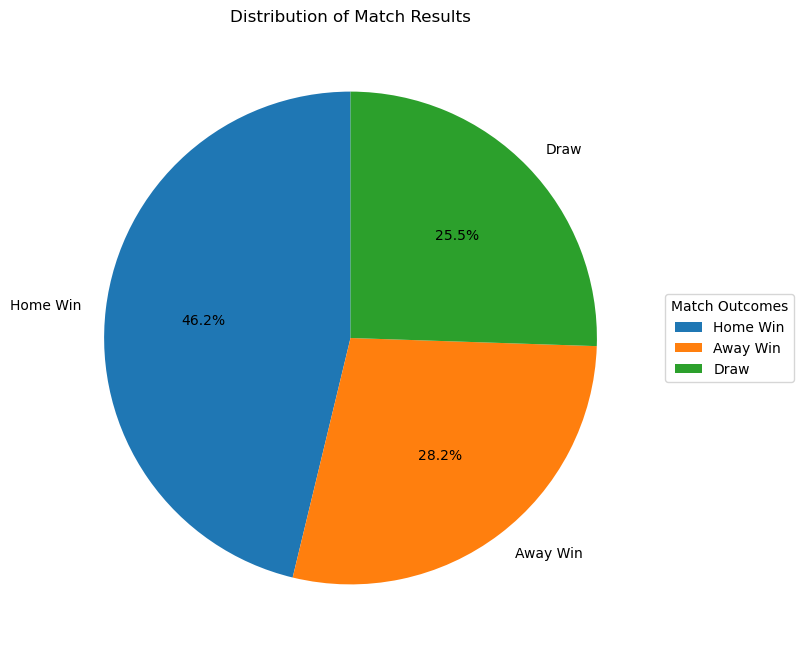

In [9]:
# Distribution of Match Outcomes (Pie Chart)
# Calculate the frequency of each result type
outcomes = resultData['result'].value_counts()

# Define labels for the pie chart
labels = ['Home Win', 'Away Win', 'Draw']

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    outcomes, labels=labels, autopct='%1.1f%%', startangle=90
)

# Add a legend to the side
ax.legend(wedges, labels, title="Match Outcomes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Set title and show the chart
plt.title('Distribution of Match Results')
plt.show()


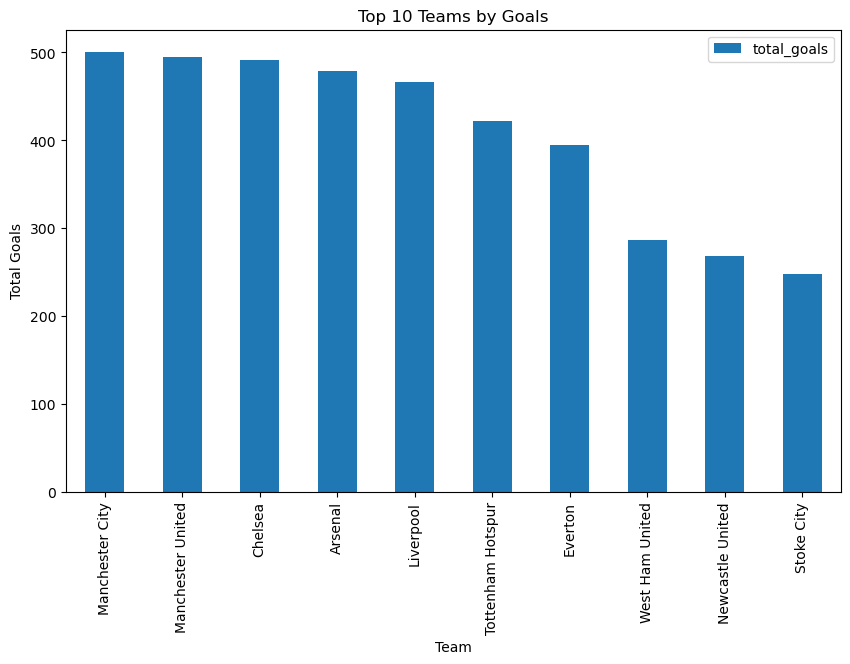

In [10]:
# Number of Goals Scored per Team (Bar Plot)
# Aggregate total goals for each team (home + away)
team_goals = resultData.groupby('home_team').agg(
    total_goals=('home_goals', 'sum')
).reset_index()

# Plotting the top 10 teams by goals
team_goals = team_goals.sort_values(by='total_goals', ascending=False).head(10)
team_goals.plot(x='home_team', y='total_goals', kind='bar', figsize=(10, 6), title='Top 10 Teams by Goals')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.show()

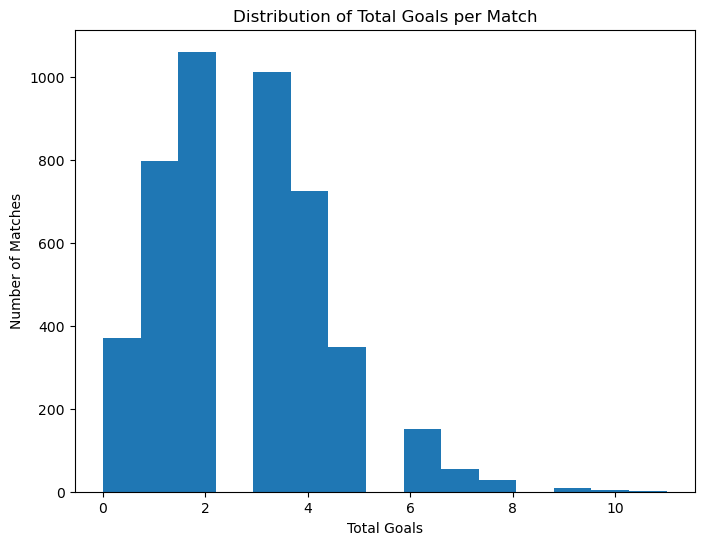

In [11]:
# Goals Distribution per Match (Histogram)
# Calculate total goals per match
resultData['total_goals'] = resultData['home_goals'] + resultData['away_goals']

# Plotting
resultData['total_goals'].plot(kind='hist', bins=15, figsize=(8, 6), title='Distribution of Total Goals per Match')
plt.xlabel('Total Goals')
plt.ylabel('Number of Matches')
plt.show()


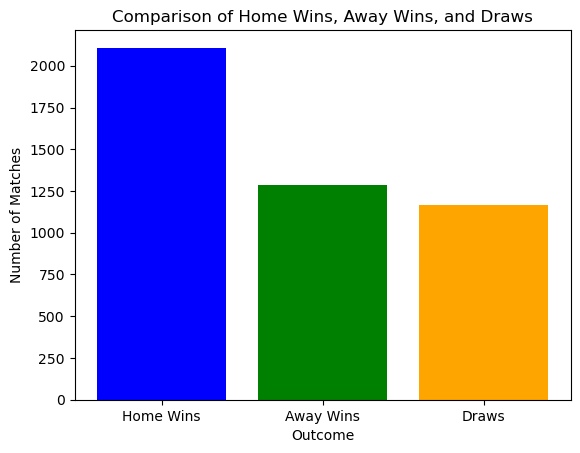

In [12]:
# Home vs. Away Wins Comparison (Bar Plot)
# Count home and away wins
home_wins = resultData[resultData['result'] == 'H'].shape[0]
away_wins = resultData[resultData['result'] == 'A'].shape[0]
draws = resultData[resultData['result'] == 'D'].shape[0]

# Plotting
plt.bar(['Home Wins', 'Away Wins', 'Draws'], [home_wins, away_wins, draws], color=['blue', 'green', 'orange'])
plt.title('Comparison of Home Wins, Away Wins, and Draws')
plt.xlabel('Outcome')
plt.ylabel('Number of Matches')
plt.show()


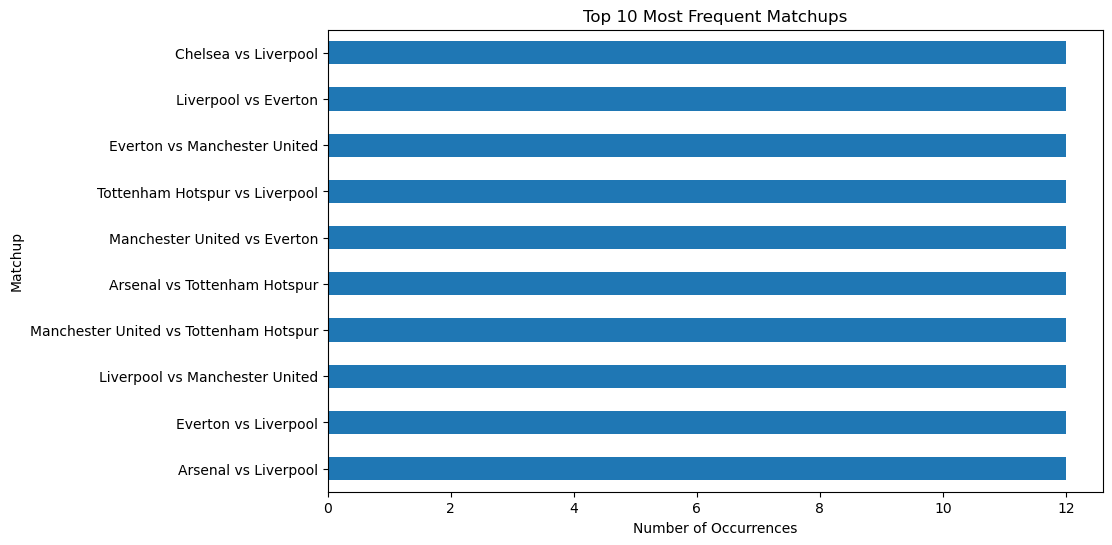

In [13]:
# Most Frequent Matchups (Horizontal Bar Plot)
# Create a 'matchup' column
resultData['matchup'] = resultData[['home_team', 'away_team']].agg(' vs '.join, axis=1)

# Count the occurrences of each matchup
matchup_counts = resultData['matchup'].value_counts().head(10)

# Plotting
matchup_counts.plot(kind='barh', figsize=(10, 6), title='Top 10 Most Frequent Matchups')
plt.xlabel('Number of Occurrences')
plt.ylabel('Matchup')
plt.show()

In [15]:
statsData = pd.read_csv("archive/stats.csv")
statsData.head(6)

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007
5,Bolton Wanderers,16.0,14.0,47.0,84.0,4.0,404.0,120.0,7.0,10.0,...,942.0,217.0,18932.0,NaN,6.0,NaN,2.0,44.0,21.0,2006-2007


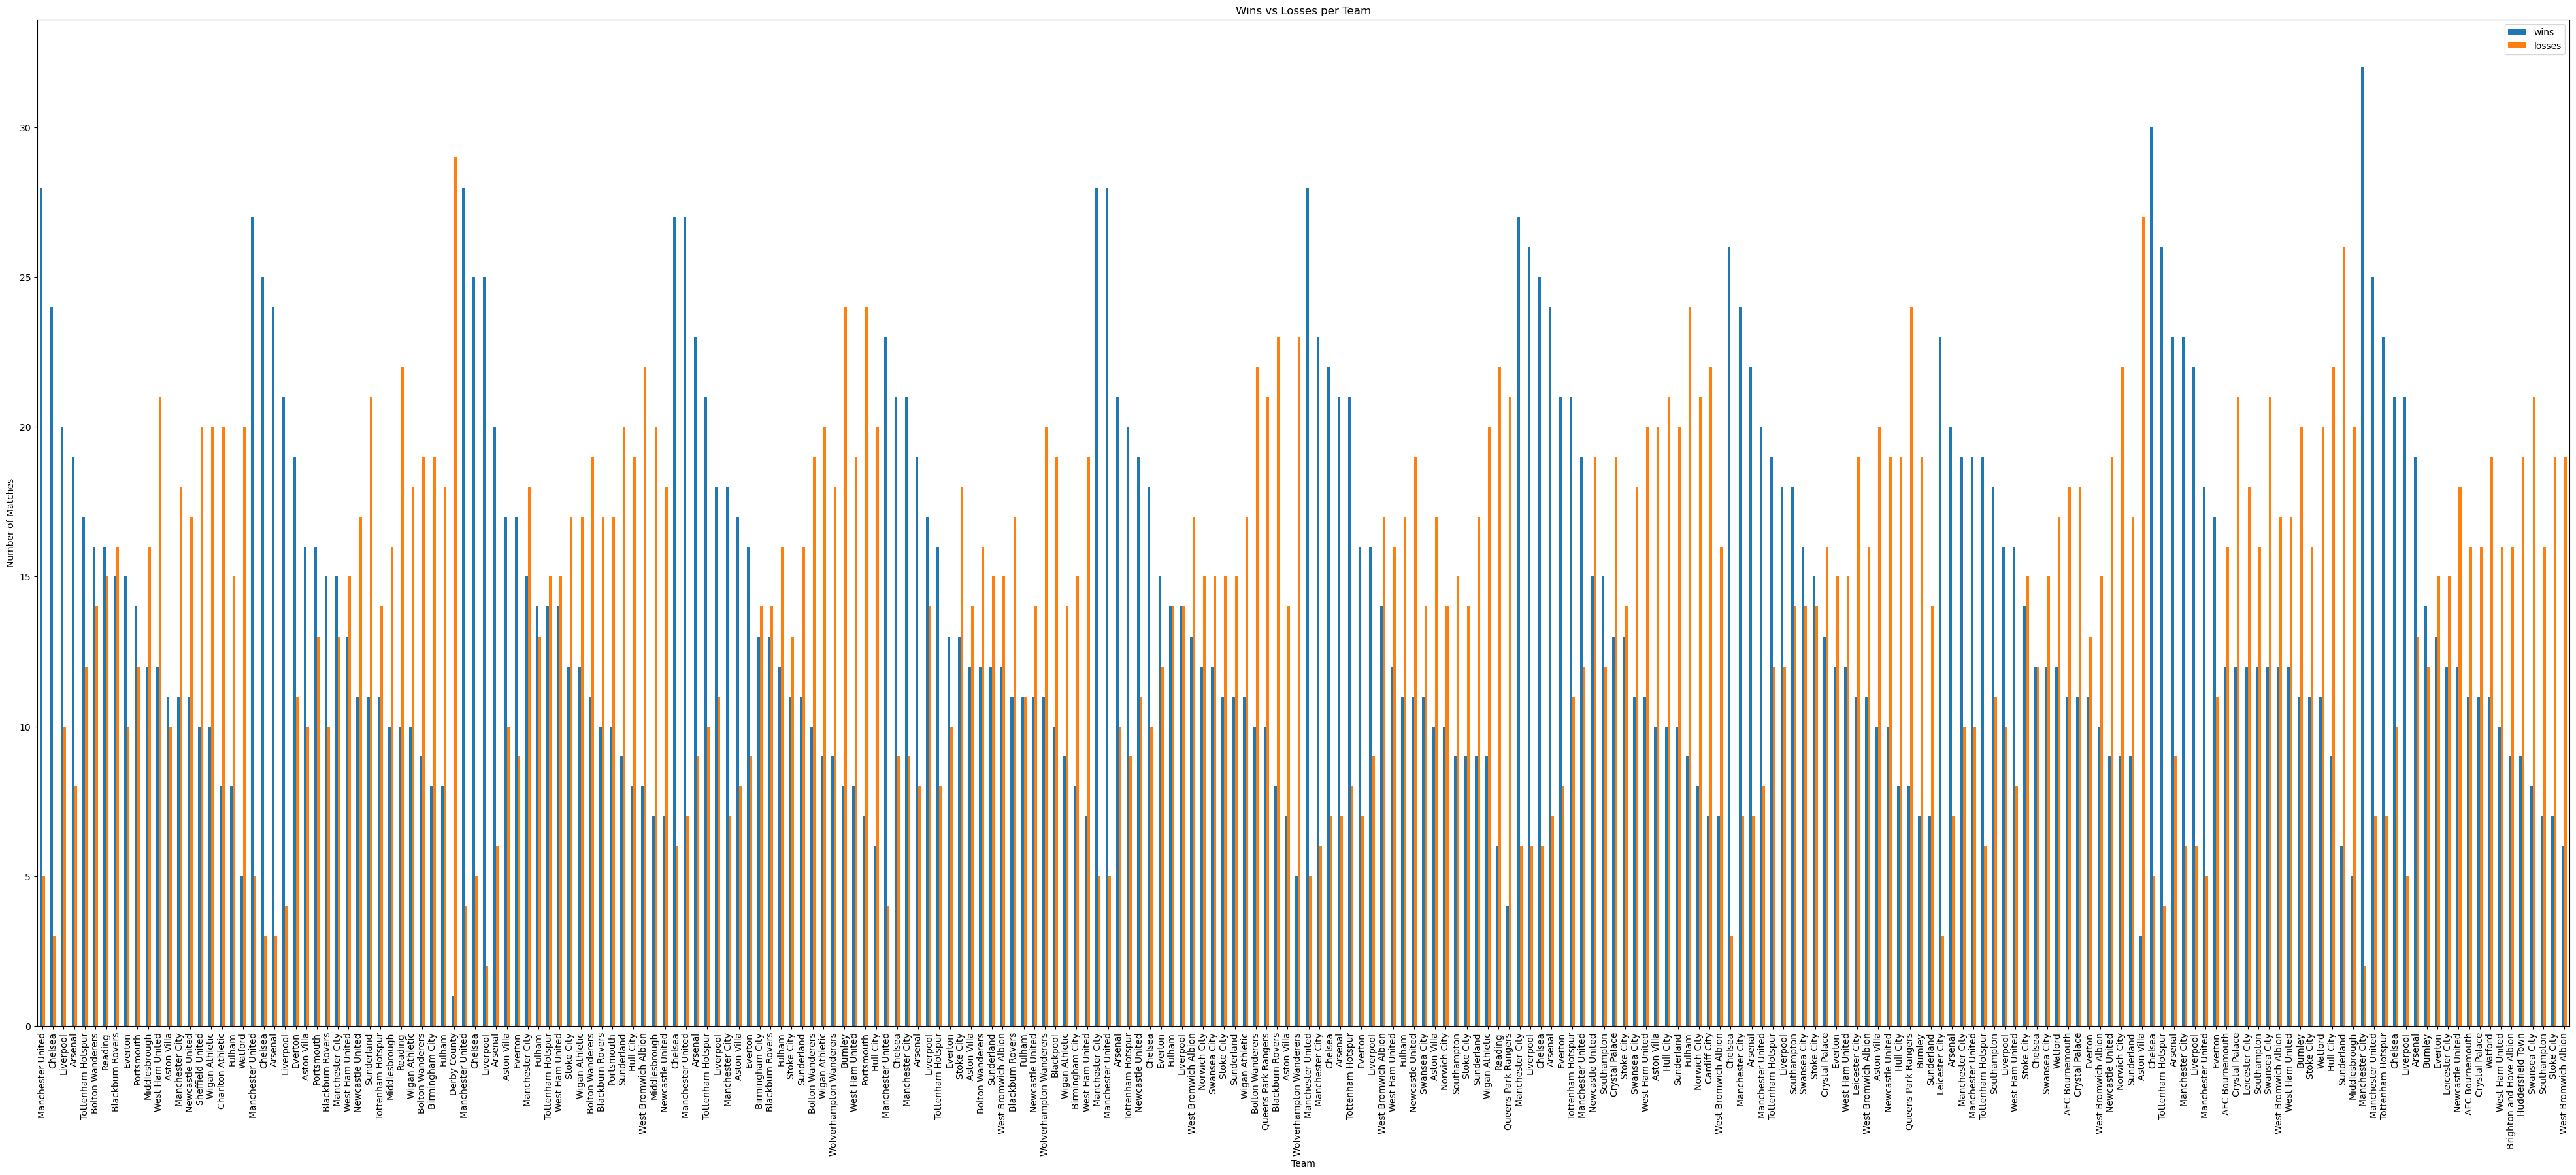

In [20]:
# Wins vs. Losses per Team (Bar Plot)
# Plotting wins and losses per team
fig, ax = plt.subplots(figsize=(50, 20))
statsData.plot(x='team', y=['wins', 'losses'], kind='bar', ax=ax)
plt.title('Wins vs Losses per Team')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()

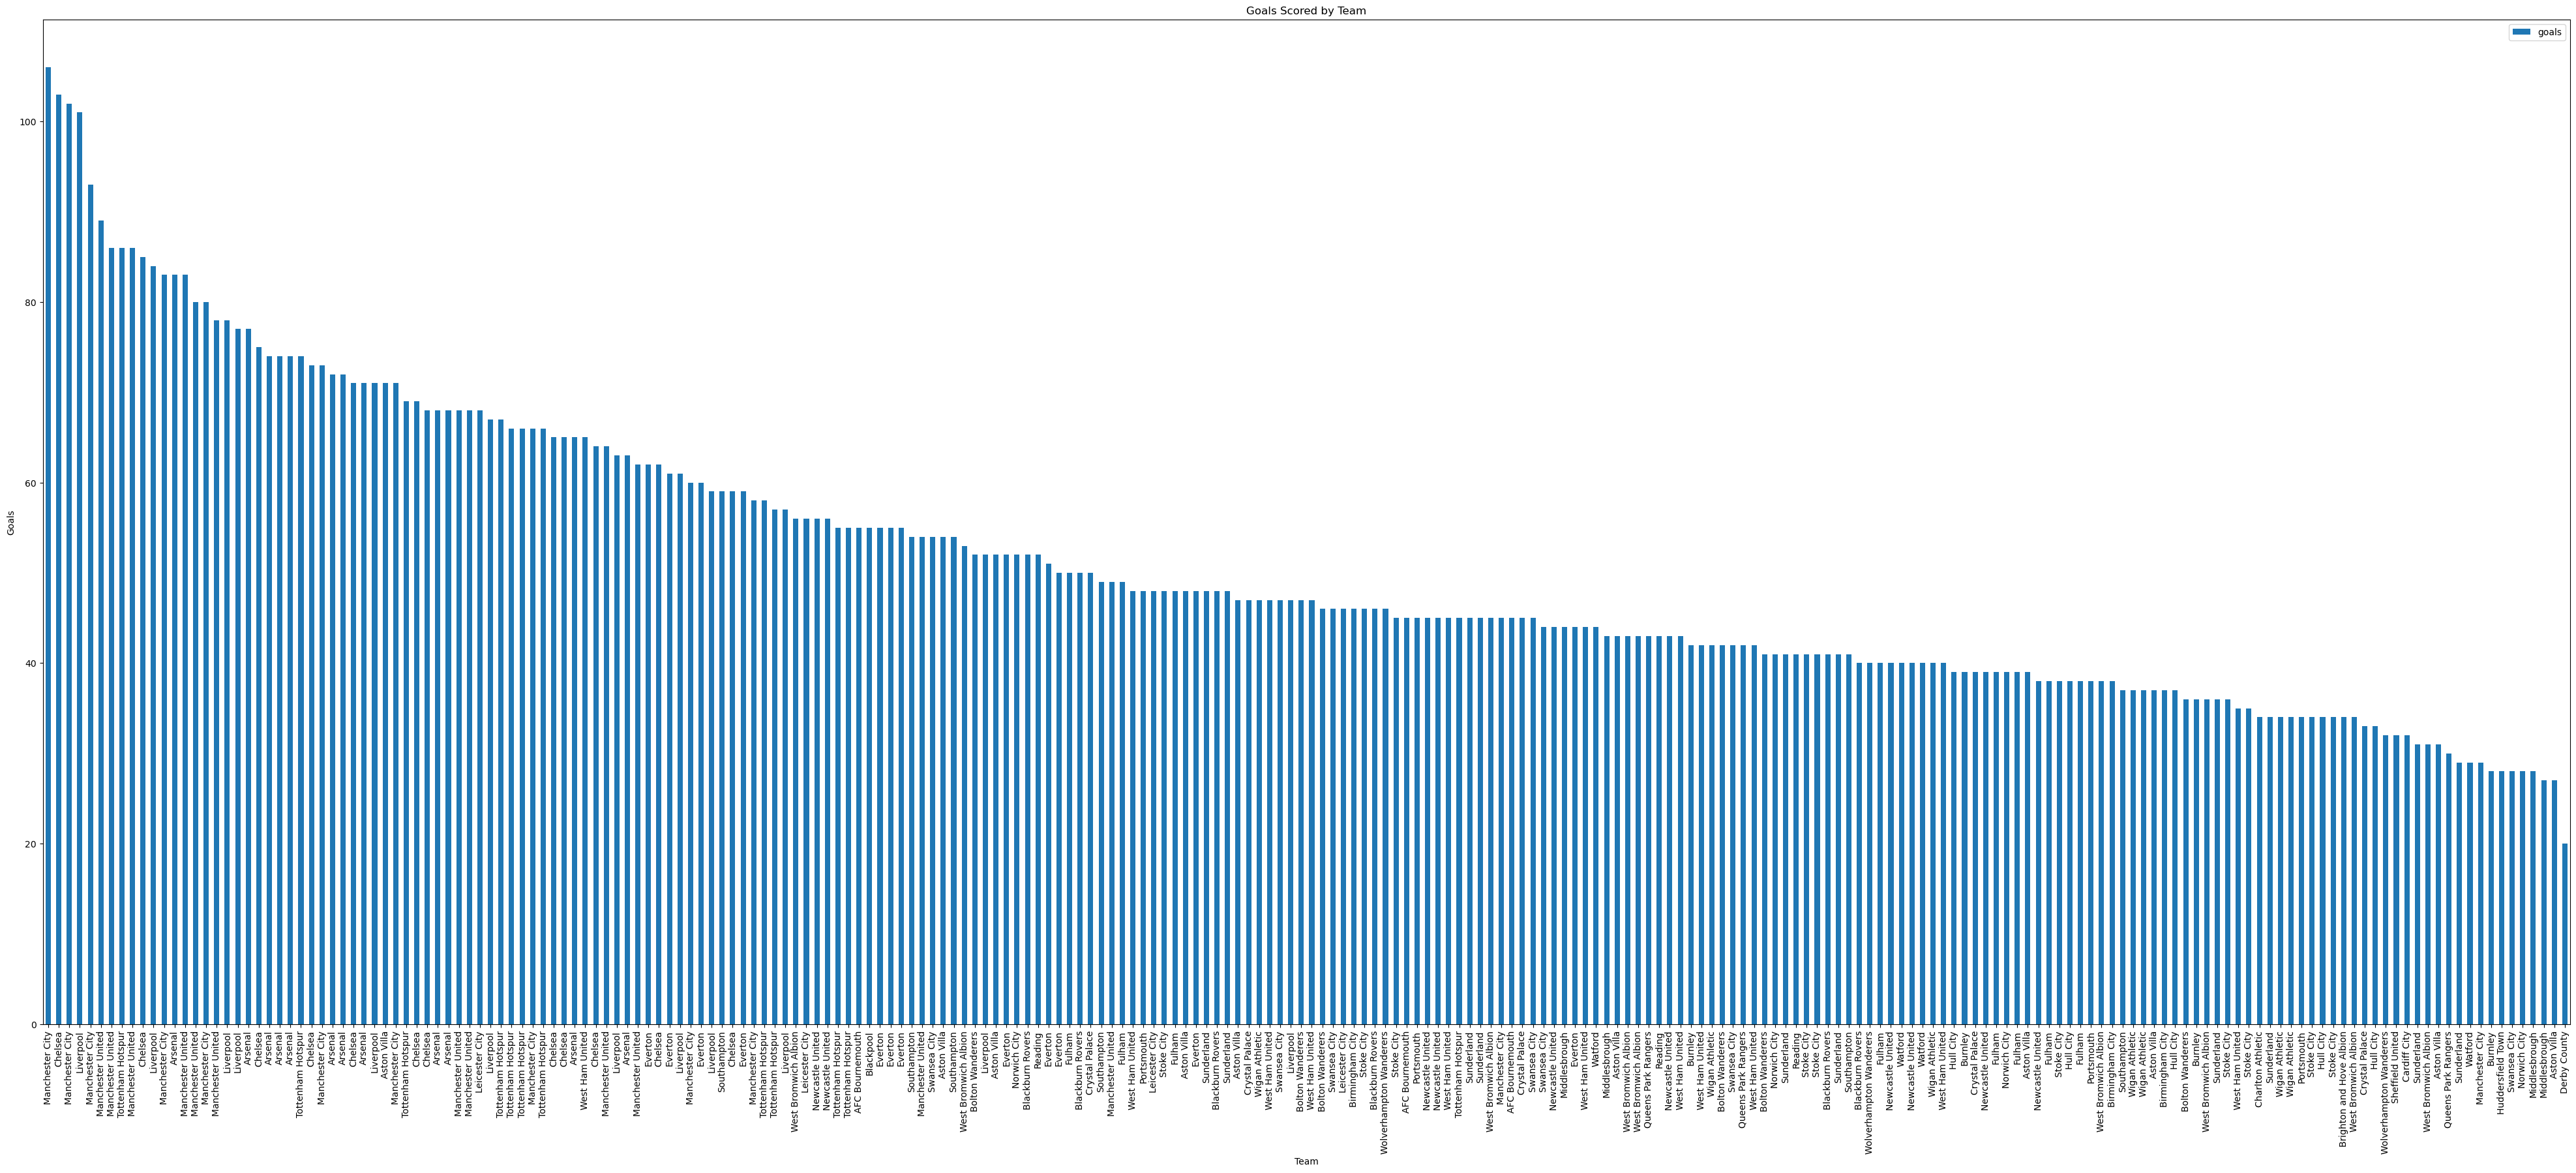

In [22]:
#  Goals Scored by Team (Bar Plot)
# Plotting total goals scored by each team
statsData.sort_values(by='goals', ascending=False).plot(
    x='team', y='goals', kind='bar', figsize=(50, 20), title='Goals Scored by Team'
)
plt.xlabel('Team')
plt.ylabel('Goals')
plt.xticks(rotation=90)
plt.show()

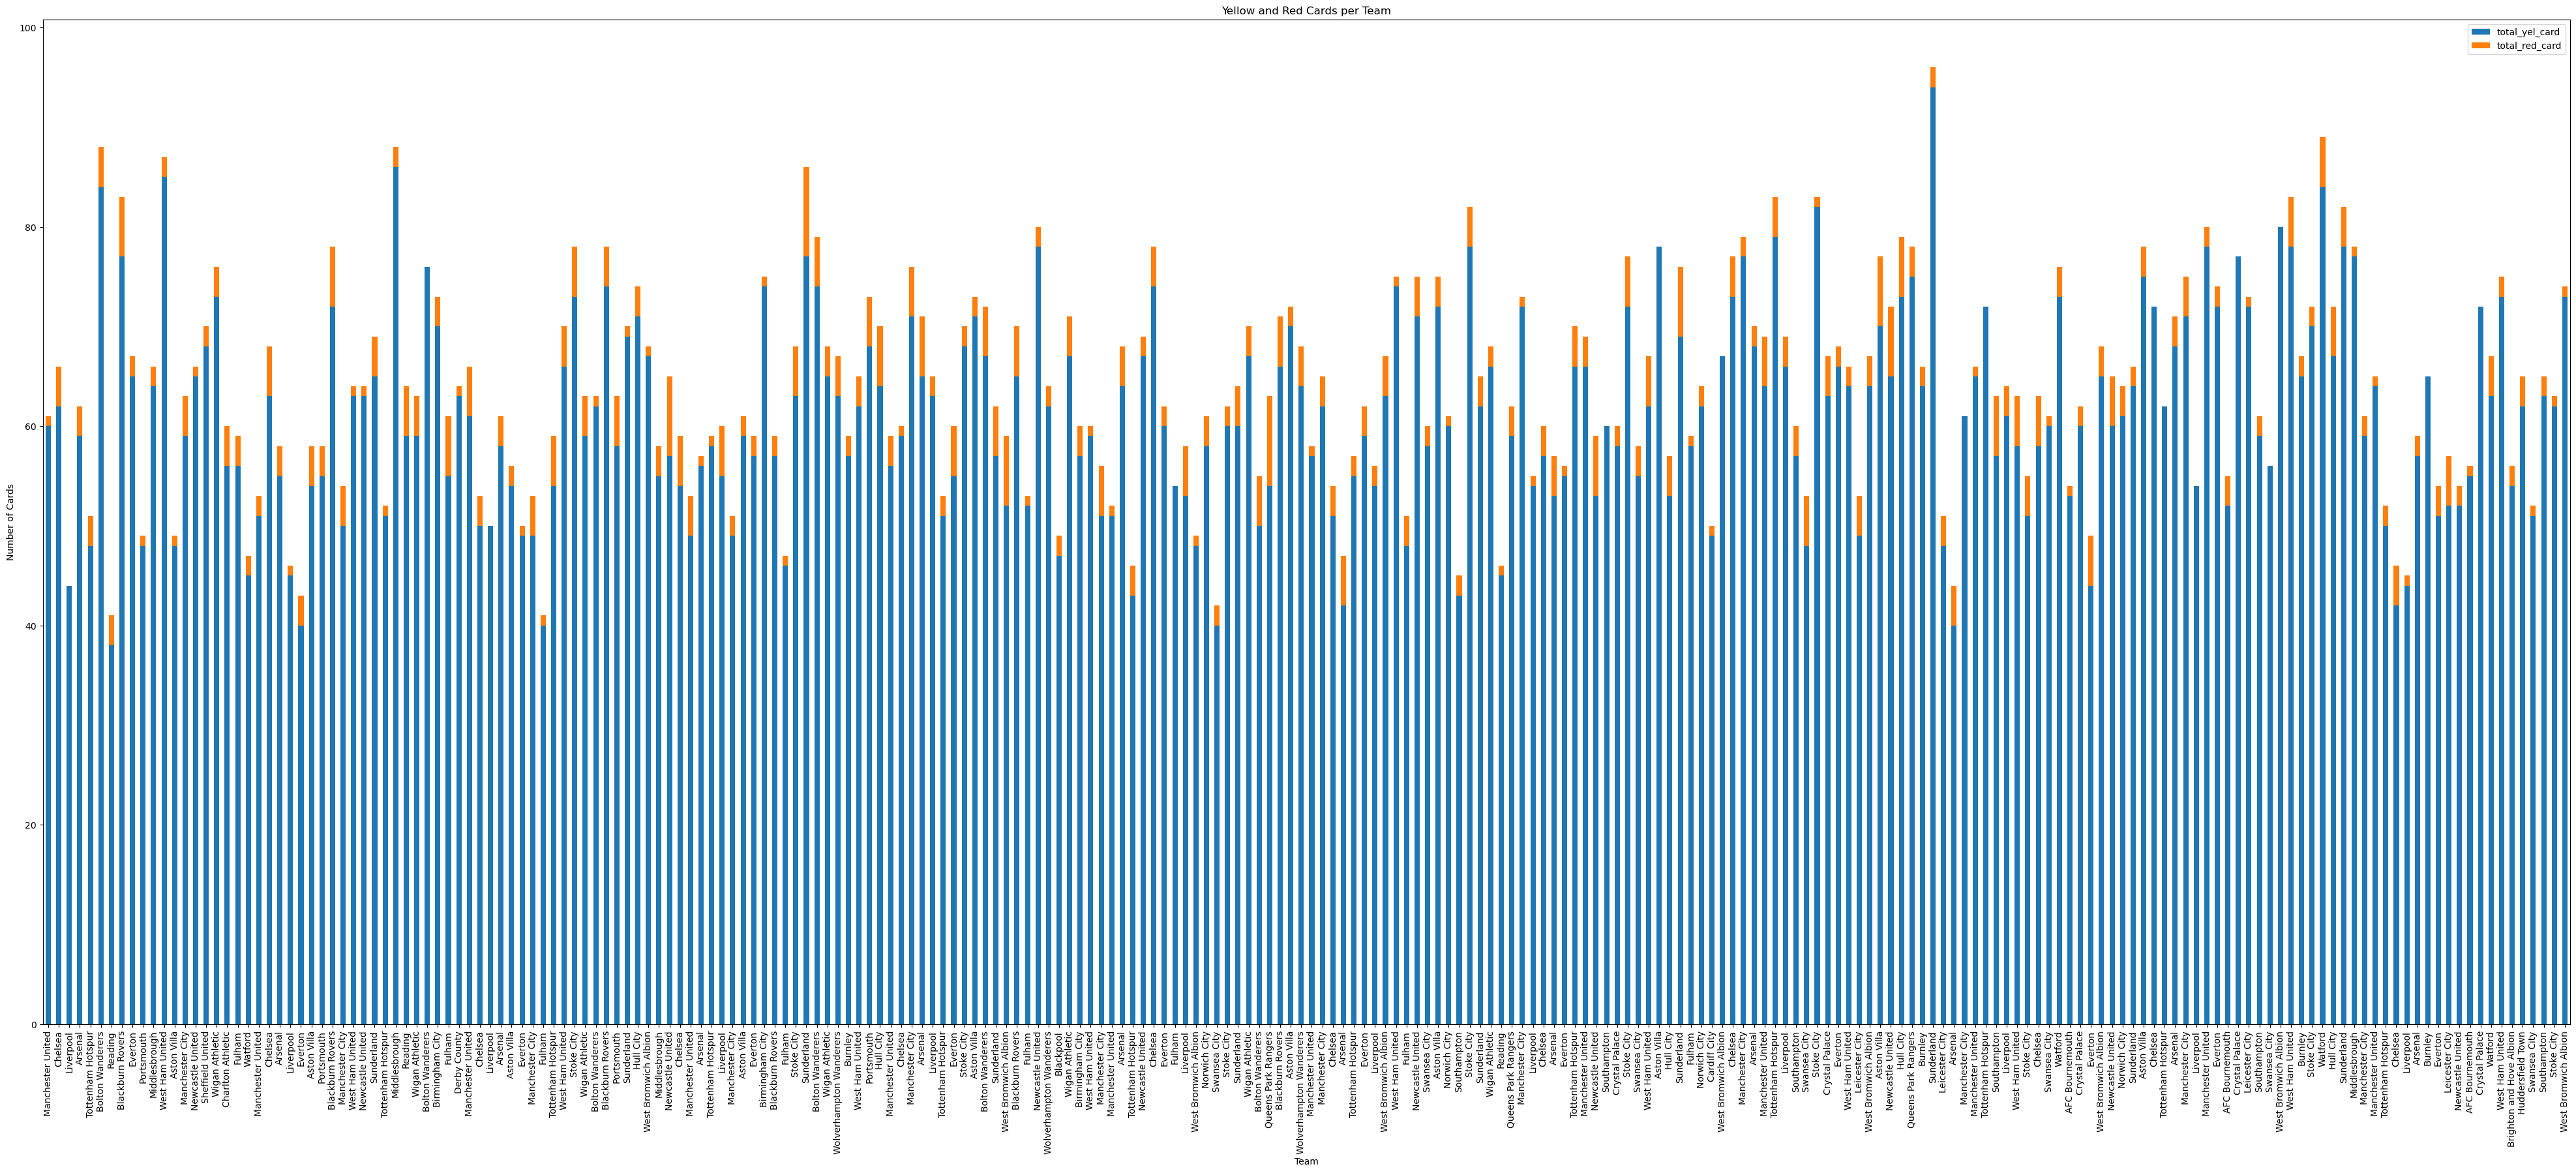

In [25]:
# Distribution of yellow and red cards
# Plotting yellow and red cards per team
fig, ax = plt.subplots(figsize=(50, 20))
statsData.plot(
    x='team', y=['total_yel_card', 'total_red_card'], kind='bar', stacked=True, ax=ax
)
plt.title('Yellow and Red Cards per Team')
plt.xlabel('Team')
plt.ylabel('Number of Cards')
plt.xticks(rotation=90)
plt.show()


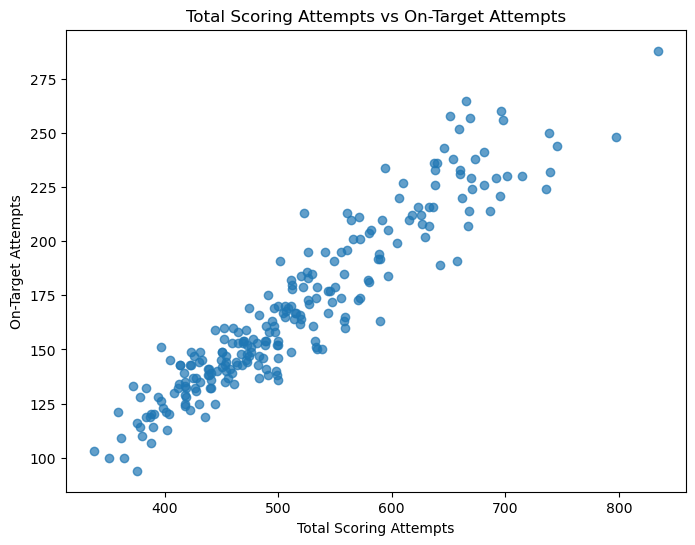

In [26]:
# Scoring Attempts vs. On-target Attempts (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(statsData['total_scoring_att'], statsData['ontarget_scoring_att'], alpha=0.7)
plt.title('Total Scoring Attempts vs On-Target Attempts')
plt.xlabel('Total Scoring Attempts')
plt.ylabel('On-Target Attempts')
plt.show()

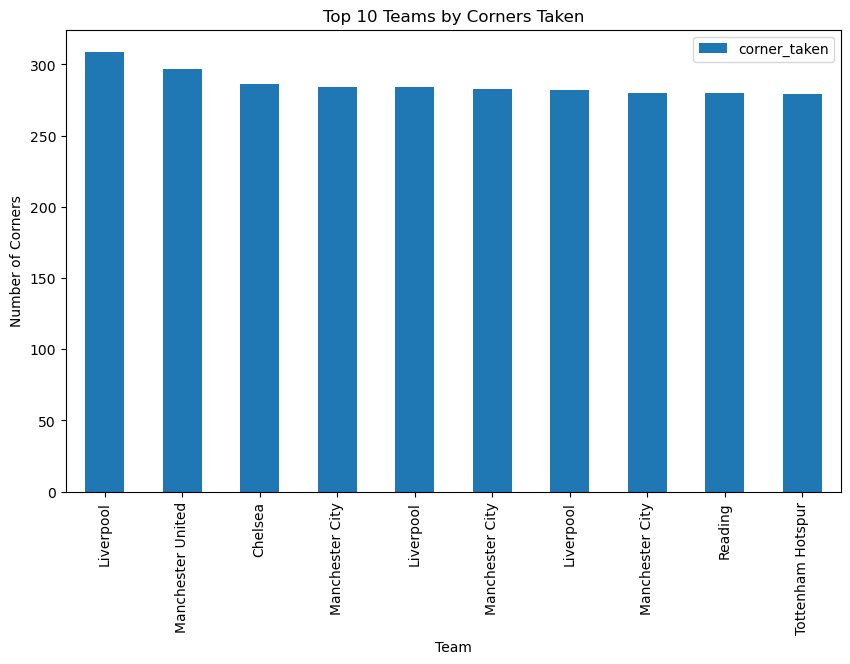

In [27]:
# Top 10 Teams by Corners Taken (Bar Plot)
top_corners = statsData.sort_values(by='corner_taken', ascending=False).head(10)
top_corners.plot(x='team', y='corner_taken', kind='bar', figsize=(10, 6))
plt.title('Top 10 Teams by Corners Taken')
plt.xlabel('Team')
plt.ylabel('Number of Corners')
plt.show()

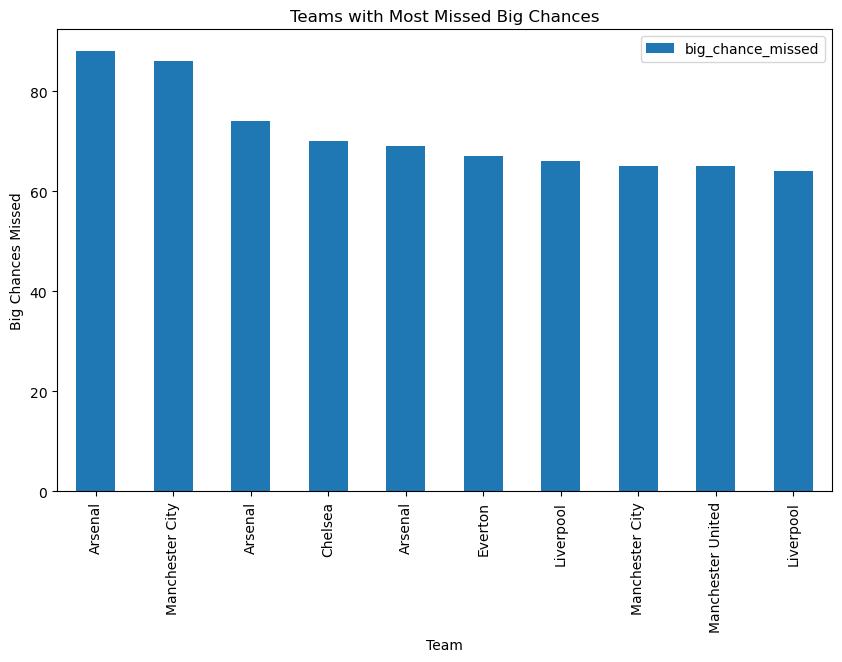

In [28]:
#  Teams with Most Missed Big Chances (Bar Plot)
statsData.sort_values(by='big_chance_missed', ascending=False).head(10).plot(
    x='team', y='big_chance_missed', kind='bar', figsize=(10, 6), title='Teams with Most Missed Big Chances'
)
plt.xlabel('Team')
plt.ylabel('Big Chances Missed')
plt.show()

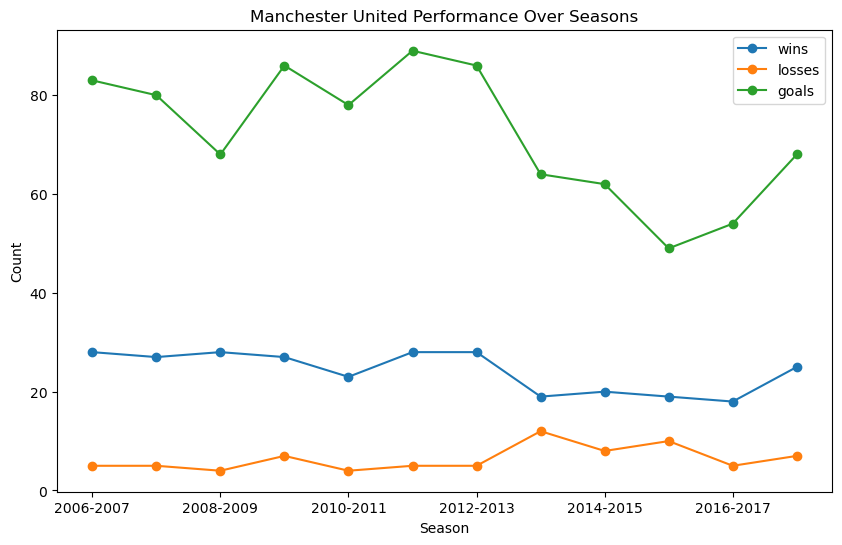

In [29]:
# Performance trend over seasons
# Filter data for a specific team (e.g., Manchester United)
team_data = statsData[statsData['team'] == 'Manchester United']

# Plotting wins, losses, and goals over seasons
team_data.plot(x='season', y=['wins', 'losses', 'goals'], kind='line', marker='o', figsize=(10, 6))
plt.title('Manchester United Performance Over Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()